# Imputing Missing Values in Data

## Load Data

In [43]:
import sys,tempfile, urllib, os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

BASE_DIR = '/tmp'
OUTPUT_FILE = os.path.join(BASE_DIR, 'churn_data.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




customerID - Customer ID

gender - Whether the customer is a male or a female

SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)

Partner - Whether the customer has a partner or not (Yes, No)

Dependents - Whether the customer has dependents or not (Yes, No)

tenure - Number of months the customer has stayed with the company

PhoneService - Whether the customer has a phone service or not (Yes, No)

MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService - Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract - The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - The amount charged to the customer monthly

TotalCharges - The total amount charged to the customer

Churn - Whether the customer churned or not (Yes or No)


# Find Missing Data

In [0]:
churn_data=urllib.request.urlretrieve('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv', OUTPUT_FILE)

In [0]:
churn_df_master = pd.read_csv(OUTPUT_FILE)

In [0]:
churn_df = churn_df_master.copy()

In [33]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [34]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7032 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [35]:
# Missing values per column
churn_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [36]:
print("Number of Rows: %s "%(churn_df.shape[0]))
print("Number of Columns: %s "%(churn_df.shape[1]))
print("\n Features: ", churn_df.columns.to_list())
print("\n Missing Values: %s"%(churn_df.isnull().any()))
print("\n Unique values: %s"%(churn_df.nunique()))

Number of Rows: 7043 
Number of Columns: 10 

 Features:  ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

 Missing Values: customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

 Unique values: customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


# See the missing rows

In [37]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


In [38]:
# Hmm maybe tenure = 0 has got some relation
churn_df[churn_df["tenure"] == 0]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


In [0]:
# So total charges are null when tenure is 0.
# Either we can just copy the monthly charges to total charges or put 0

In [40]:
# Lot of variation
churn_df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [41]:
churn_df[churn_df['Churn']=='No'].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5163.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.344141
std,0.334923,24.113777,1.890418,31.092648,2329.456984
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,577.825000
50%,0.000000,38.000000,6.000000,64.425000,1683.600000
75%,0.000000,61.000000,7.000000,88.400000,4264.125000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


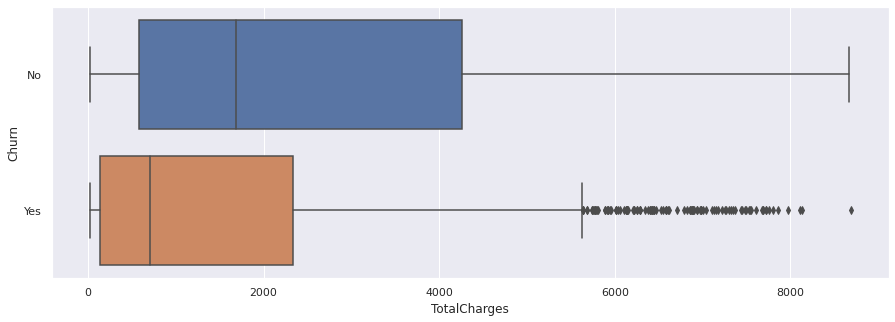

In [44]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="TotalCharges", y="Churn", data=churn_df)

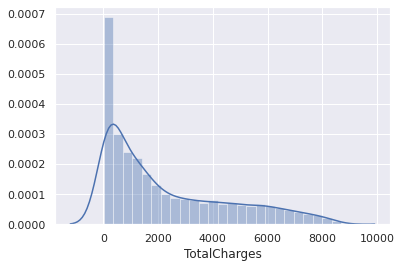

In [45]:
sns.distplot(churn_df["TotalCharges"], hist=True)

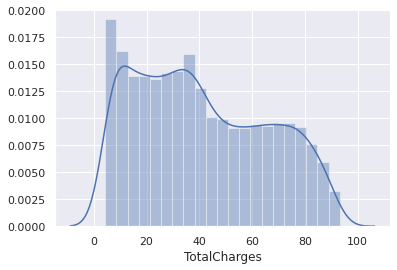

In [47]:
sns.distplot(churn_df["TotalCharges"].apply(np.sqrt), hist=True)

# Plot against each other to see if we can impute



Plot monthly and Total charges against each other to see if we can impute

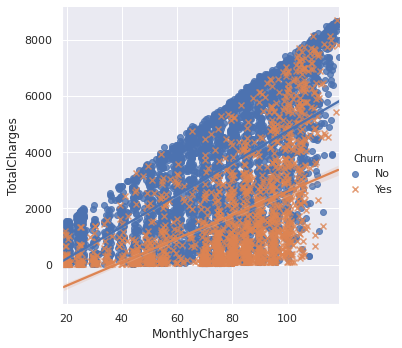

In [48]:
sns.lmplot(x="MonthlyCharges", y="TotalCharges", data=churn_df, fit_reg=True, hue="Churn", markers=["o", "x"])

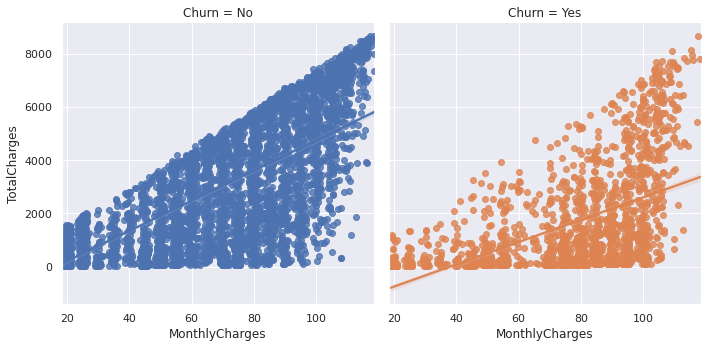

In [49]:
sns.lmplot(x="MonthlyCharges", y="TotalCharges", data=churn_df, fit_reg=True, col="Churn", hue="Churn")

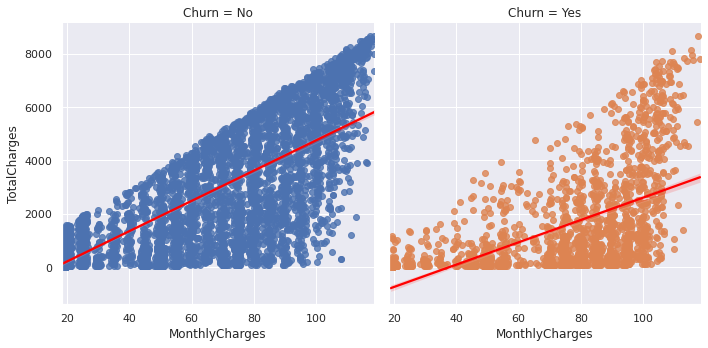

In [50]:
sns.lmplot(x="MonthlyCharges", y="TotalCharges", data=churn_df, fit_reg=True, col="Churn", hue="Churn", line_kws={'color': 'red'})

In [51]:
churn_df[['TotalCharges', 'MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.651065
MonthlyCharges,0.651065,1.000000


In [52]:
churn_df[churn_df["Churn"]=="No"][['TotalCharges', 'MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.00000,0.75711
MonthlyCharges,0.75711,1.00000


# Imputing with Monthly Charges

In [0]:
churn_no_df = churn_df[(churn_df['Churn'] == 'No') & (churn_df['TotalCharges'].isna()==False)]

In [55]:
churn_no_df.shape

(5163, 10)

In [57]:
churn_no_df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [0]:
from scipy import stats

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df['MonthlyCharges'], churn_no_df['TotalCharges'])

In [60]:
print("slope: ",slope)
print("Intercept: ",intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)
print("R-squared", r_value**2)

slope:  56.719089515043095
Intercept:  -921.9562487042454
r_value 0.7571099054701252
p_value 0.0
std_err 0.681251950036741
R-squared 0.573215408960982


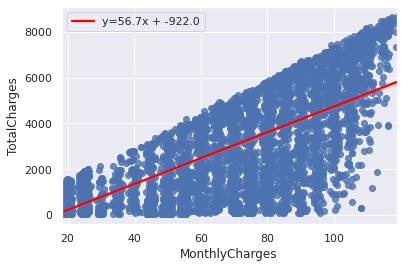

In [63]:
ax = sns.regplot(x="MonthlyCharges", y="TotalCharges", data=churn_no_df, line_kws={'color': 'red', 'label' : 'y={0:.1f}x + {1:.1f}'.format(slope, intercept)})
ax.legend(loc="best")

# Trying that with Tenure

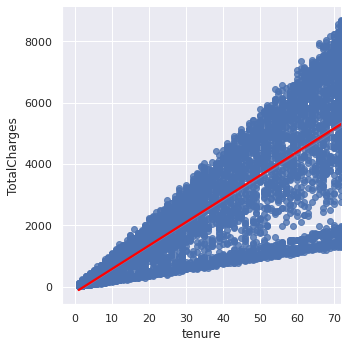

In [65]:
sns.lmplot(x="tenure", y="TotalCharges", data=churn_df, fit_reg=True, line_kws={'color':'red'})

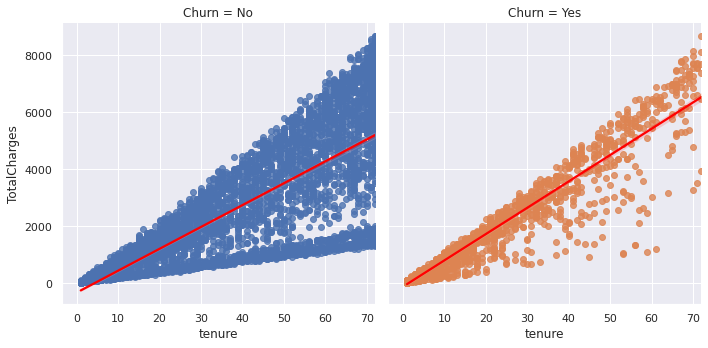

In [66]:
sns.lmplot(x="tenure", y="TotalCharges", data=churn_df, fit_reg=True, col="Churn", hue="Churn", line_kws={'color':'red'})

In [67]:
churn_df[['TotalCharges', 'tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.00000,0.82588
tenure,0.82588,1.00000


In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df['tenure'], churn_no_df['TotalCharges'])

In [69]:
print("slope: ",slope)
print("Intercept: ",intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)
print("R-squared", r_value**2)

slope:  76.74016671293452
Intercept:  -333.9238789128808
r_value 0.7931755945410734
p_value 0.0
std_err 0.8201603465121385
R-squared 0.6291275237755853


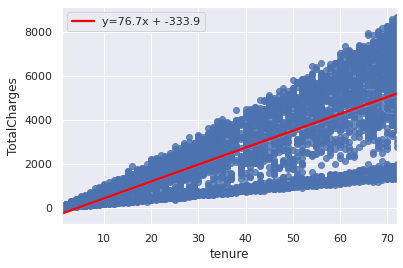

In [71]:
ax = sns.regplot(x="tenure", y="TotalCharges", data=churn_no_df, line_kws={'color': 'red', 'label' : 'y={0:.1f}x + {1:.1f}'.format(slope, intercept)})
ax.legend(loc="best")

# Try to use both of them

In [73]:
churn_no_df['tenure_charges'] = churn_no_df['tenure'] * churn_no_df['MonthlyCharges']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
churn_no_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No,297.50


In [75]:
churn_no_df[churn_no_df['Churn'] == 'No'][['TotalCharges', 'tenure_charges']].corr()

,TotalCharges,tenure_charges
TotalCharges,1.000000,0.999536
tenure_charges,0.999536,1.000000


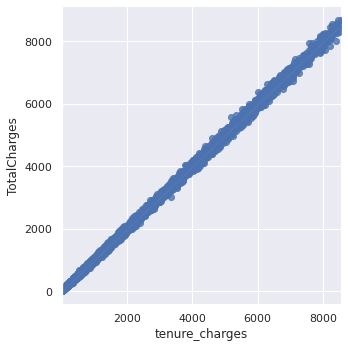

In [76]:
sns.lmplot(x="tenure_charges", y="TotalCharges", data=churn_no_df)

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df['tenure_charges'], churn_no_df['TotalCharges'])

In [78]:
print("slope: ",slope)
print("Intercept: ",intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)
print("R-squared", r_value**2)

slope:  1.0002050152353281
Intercept:  -0.3829975740923146
r_value 0.9995360895506968
p_value 0.0
std_err 0.00042423385145342663
R-squared 0.9990723943142986


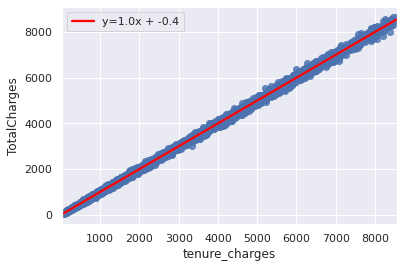

In [79]:
ax = sns.regplot(x="tenure_charges", y="TotalCharges", data=churn_no_df, line_kws={'color': 'red', 'label' : 'y={0:.1f}x + {1:.1f}'.format(slope, intercept)})
ax.legend(loc="best")

In [0]:
def fillna(tenure, monthlycharge):
    if tenure == 0:
        totcharges = monthlycharge
    else:
        totcharges = tenure * monthlycharge
        totcharges = intercept + (totcharges * slope)
    
    return round(totcharges, 2)

In [0]:
churn_df['TotalChargesNew'] = churn_df.apply(lambda x: x['TotalCharges'] if not pd.isna(x['TotalCharges']) else fillna(x['tenure'], x['MonthlyCharges']), 
                                             axis=1)

In [82]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges,TotalChargesNew
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes,NaN,108.15
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes,NaN,151.65
5,9305-CDSKC,Female,0,8,6,Month-to-month,Yes,99.65,820.50,Yes,NaN,820.50
8,7892-POOKP,Female,0,28,7,Month-to-month,Yes,104.80,3046.05,Yes,NaN,3046.05
13,0280-XJGEX,Male,0,49,7,Month-to-month,Yes,103.70,5036.30,Yes,NaN,5036.30
...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,12,4,One year,Yes,59.80,727.80,Yes,NaN,727.80
7026,8775-CEBBJ,Female,0,9,2,Month-to-month,Yes,44.20,403.35,Yes,NaN,403.35
7032,6894-LFHLY,Male,1,1,3,Month-to-month,Yes,75.75,75.75,Yes,NaN,75.75
7034,0639-TSIQW,Female,0,67,7,Month-to-month,Yes,102.95,6886.25,Yes,NaN,6886.25
